<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ISE-291-Term-Project" data-toc-modified-id="ISE-291-Term-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ISE 291 Term Project</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task-1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task-2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task-3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task-4</a></span></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task-5</a></span></li><li><span><a href="#Task-6" data-toc-modified-id="Task-6-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task-6</a></span></li><li><span><a href="#Task-7" data-toc-modified-id="Task-7-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Task-7</a></span></li><li><span><a href="#Task-8" data-toc-modified-id="Task-8-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Task-8</a></span></li><li><span><a href="#Task-9" data-toc-modified-id="Task-9-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Task-9</a></span></li><li><span><a href="#Task-10" data-toc-modified-id="Task-10-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Task-10</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

# ISE 291 Term Project 

Group Number =   

Group Members:

Names                                Student IDs


## Task-1

number of null values in model_price--> 898
number of null values in model_price--> 0
 REMOVED INCONSISTENCIES


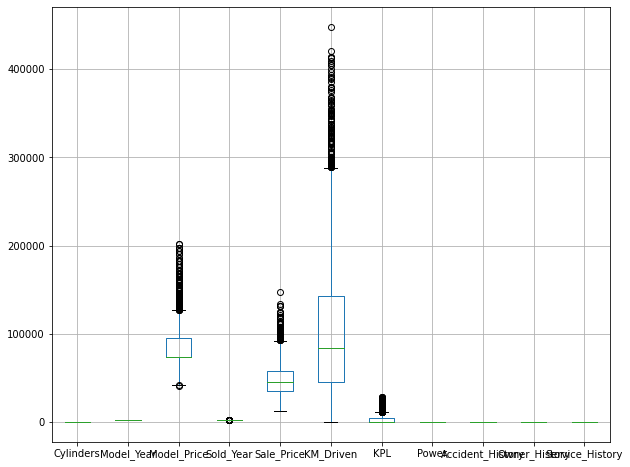

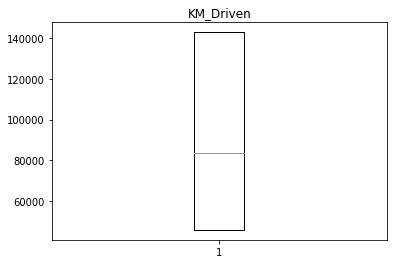

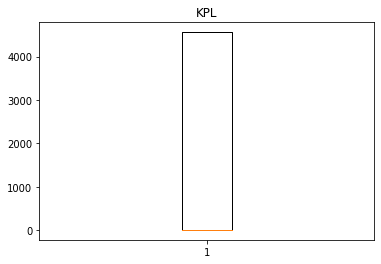

OUTLIERS REMOVED


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
from sklearn.linear_model import LinearRegression
#using Closed Form Solution for MISO Linear Regression

df1 = pd.read_csv('Group_01_11_A.csv')
# only model_price has NaN values, so we use mode to impute the NaN values 

mode=df1['Model_Price'].mode()
print(f'number of null values in model_price--> {df1["Model_Price"].isna().sum()}')
df1['Model_Price'].fillna(mode[0],inplace=True)
print(f'number of null values in model_price--> {df1["Model_Price"].isna().sum()}')
# IMPUTING into NaN's

# removing inconsistencies
## we see that the sale price and model price columns are in SAR so we convert it to int

df1["Sale_Price"]=df1["Sale_Price"].apply(lambda x: int(x.replace(",","").replace("SAR","")))
df1["Model_Price"]=df1["Model_Price"].apply(lambda x: int(x.replace(",","").replace("SAR","")))
df1["KPL"]=df1["KPL"].apply(lambda x: float(str(x).replace("mpl","")))
df1['Power'] = df1['Power'].apply(lambda x: float(str(x).replace("WD","")))

print(' REMOVED INCONSISTENCIES')
num = df1.select_dtypes(exclude='object')


plt.figure(figsize=(10,8))
df1.boxplot()
plt.show()

### only km_driven & sale_price has outliers !!
# we decide to drop the outliers of 10th percentile and 90th percentile
def impute(col):
    quant25 = df1[col].quantile(0.25)
    quant75 = df1[col].quantile(0.75)
    median = df1[col].median()
    df1[col] = np.where(df1[col]<quant25,quant25,df1[col])
    df1[col] = np.where(df1[col]>quant75,quant75,df1[col])
    plt.boxplot(df1[col])
    plt.title(col)
    plt.show()
    return df1[col]
    
df1['KM_Driven'] = impute('KM_Driven')
df1['KPL'] = impute('KPL')
print('OUTLIERS REMOVED')
# imputation solves the evident problem of outlier

### only km_driven & sale_price has outliers !!
# we cannot drop sales_price or impute into outliers since its our target variable and it may effect our model performance !

In [3]:
df1.to_csv('cars.csv',index=False)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      3000 non-null   object 
 1   Type              3000 non-null   object 
 2   Cylinders         3000 non-null   int64  
 3   Model_Year        3000 non-null   int64  
 4   Model_Price       3000 non-null   int64  
 5   Sold_Year         3000 non-null   int64  
 6   Sale_Price        3000 non-null   int64  
 7   KM_Driven         3000 non-null   float64
 8   KPL               3000 non-null   float64
 9   Power             3000 non-null   float64
 10  Class             3000 non-null   object 
 11  Location          3000 non-null   object 
 12  Accident_History  3000 non-null   int64  
 13  Owner_History     3000 non-null   int64  
 14  Color             3000 non-null   object 
 15  Seller_Type       3000 non-null   object 
 16  Service_History   3000 non-null   int64  


## Task-2

In [240]:
df1['KPL']

0       19740.0mpl
1            10.91
2             3.29
3             5.15
4              8.9
           ...    
2995          8.82
2996     8230.0mpl
2997          9.67
2998           9.2
2999    14430.0mpl
Name: KPL, Length: 3000, dtype: object

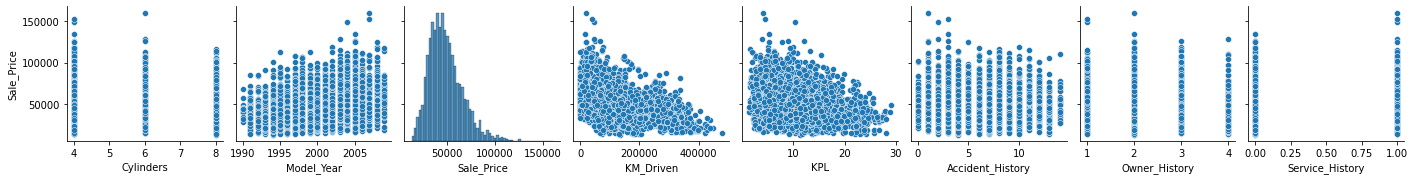

In [289]:
df2 = pd.read_csv('Group_13_05_B.csv')
df2["Sale_Price"]=df2["Sale_Price"].apply(lambda x: int(str(x).replace(",","").replace("SAR","")))
df2["Model_Price"]=df2["Model_Price"].apply(lambda x: int(str(x).replace(",","").replace("SAR","")))
num = df.select_dtypes(exclude='object')
sns.pairplot(x_vars=num.columns,y_vars ='Sale_Price',data=df2)   
warnings.filterwarnings('ignore')
plt.show()
#plotting pairplot of numeric columns with sale_price

## Task-3

In [290]:
# To find relation between variables we use correlation  
df2.corr()['Sale_Price']
# KPL, Model_year & KM_driven are 3 highly corelated columns
# ownner history , accident history, service history are 3 weakly corelated columns 

Cylinders          -0.021382
Model_Year          0.242053
Model_Price         0.738200
Sold_Year          -0.029056
Sale_Price          1.000000
KM_Driven          -0.365168
KPL                -0.260986
Accident_History   -0.077377
Owner_History      -0.014387
Service_History     0.062958
Name: Sale_Price, dtype: float64

## Task-4

In [292]:
# No the return is not shown by the input variables 
# for this we need to calculate Depriciation using the formula given to us 

df2['Depriciation'] = (df2['Model_Price']-df2['Sale_Price'])/((df2['Sold_Year']-df2['Model_Year'])*df2['Model_Price']) * 100

# The key variable of interest is Sale_Price. If the cars depreciate by 10% or less are high return cars, 
# and those that depreciate by 20% or more are low return cars

## Task-5

0    5
dtype: int64


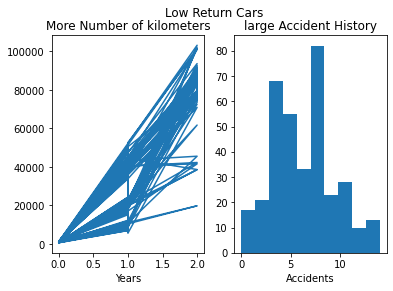

In [323]:
dep = df2[df2['Depriciation']>20]

fig,ax = plt.subplots(1,2)
ax[0].plot(dep['Sold_Year']-dep['Model_Year'],dep['KM_Driven'])
ax[0].title.set_text('More Number of kilometers')
ax[0].set_xlabel('Years')
ax[1].hist(dep['Accident_History'])
ax[1].title.set_text('large Accident History')
ax[1].set_xlabel('Accidents')
plt.suptitle('Low Return Cars')
print(dep['Accident_History'].mode())
plt.show()
# number of accidents over a period of 2 years the mode being >= 5 accidents in 2 years 
# number of kilometers travelled are high 

## Task-6

0    3
dtype: int64


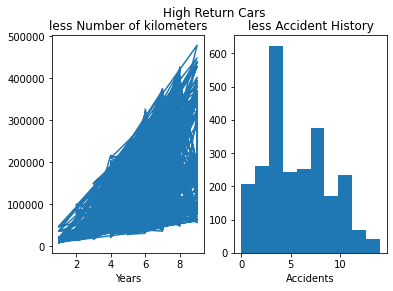

In [324]:
dep = df2[df2['Depriciation']<10]

fig,ax = plt.subplots(1,2)
ax[0].plot(dep['Sold_Year']-dep['Model_Year'],dep['KM_Driven'])
ax[0].title.set_text('less Number of kilometers')
ax[0].set_xlabel('Years')
ax[1].hist(dep['Accident_History'])
ax[1].title.set_text('less Accident History')
ax[1].set_xlabel('Accidents')
dep['Accident_History'].mode()
plt.suptitle('High Return Cars')
print(dep['Accident_History'].mode())
plt.show()
# number of kilometers travelled by the vehicle is less as compared to cars with dep>20%
# the number of accidents are also less with mode<5 over a range of 8 years

## Task-7

In [392]:
df = pd.read_csv('Group_13_05_B.csv', delimiter =',')
df["Sale_Price"]=df["Sale_Price"].apply(lambda x: int(x.replace(",","").replace("SAR","")))
df["Model_Price"]=df["Model_Price"].apply(lambda x: int(x.replace(",","").replace("SAR","")))
df["KPL"]=df["KPL"].apply(lambda x: float(str(x).replace("mpl","")))
df['Power'] = df['Power'].apply(lambda x: float(str(x).replace("WD","")))
df['Power'].astype('int')
num_columns = df.select_dtypes(exclude='object').columns.drop('Sale_Price')
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

corr=corr.apply(lambda x: np.abs(x))
sorted_corr = corr.sort_values(by=['Sale_Price'], ascending=False) # negative values will be considered using abs.

sorted_corr = sorted_corr['Sale_Price'].index
print('The top three correlated input variables are: ',sorted_corr[1:4].tolist())
print(sorted_corr)


The top three correlated input variables are:  ['Model_Price', 'KM_Driven', 'KPL']
Index(['Sale_Price', 'Model_Price', 'KM_Driven', 'KPL', 'Power', 'Model_Year',
       'Accident_History', 'Service_History', 'Sold_Year', 'Cylinders',
       'Owner_History'],
      dtype='object')


In [386]:
corr.sort_values(by=['Sale_Price'], ascending=False)['Sale_Price']

Sale_Price          1.000000
Model_Price         0.738200
KM_Driven           0.365168
KPL                 0.260986
Power               0.242078
Model_Year          0.242053
Accident_History    0.077377
Service_History     0.062958
Sold_Year           0.029056
Cylinders           0.021382
Owner_History       0.014387
Name: Sale_Price, dtype: float64

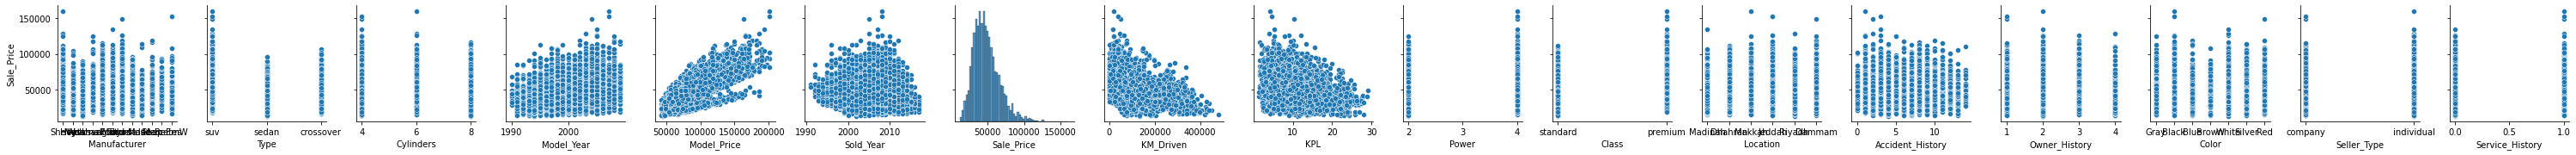

In [387]:
sns.pairplot(x_vars=df.columns,y_vars ='Sale_Price',data=df)   


## Task-8

In [340]:
## The input columns Service_History,Owner_History and Model_Price 
# Therefore we drop these columns 
# and REDO 7-task

# df.drop(['Service_History','Owner_History','Model_Price' ],axis=1,inplace=True)
corr = df.corr()
corr=corr.apply(lambda x: np.abs(x))
corr.sort_values(by=['Sale_Price'], ascending=False)['Sale_Price']

Sale_Price          1.000000
KM_Driven           0.365168
KPL                 0.260986
Model_Year          0.242053
Accident_History    0.077377
Sold_Year           0.029056
Cylinders           0.021382
Name: Sale_Price, dtype: float64

## Task-9

Cylinders
Model_Year
Model_Price
Sold_Year
Sale_Price
KM_Driven
KPL
Power
Accident_History
Owner_History
Service_History


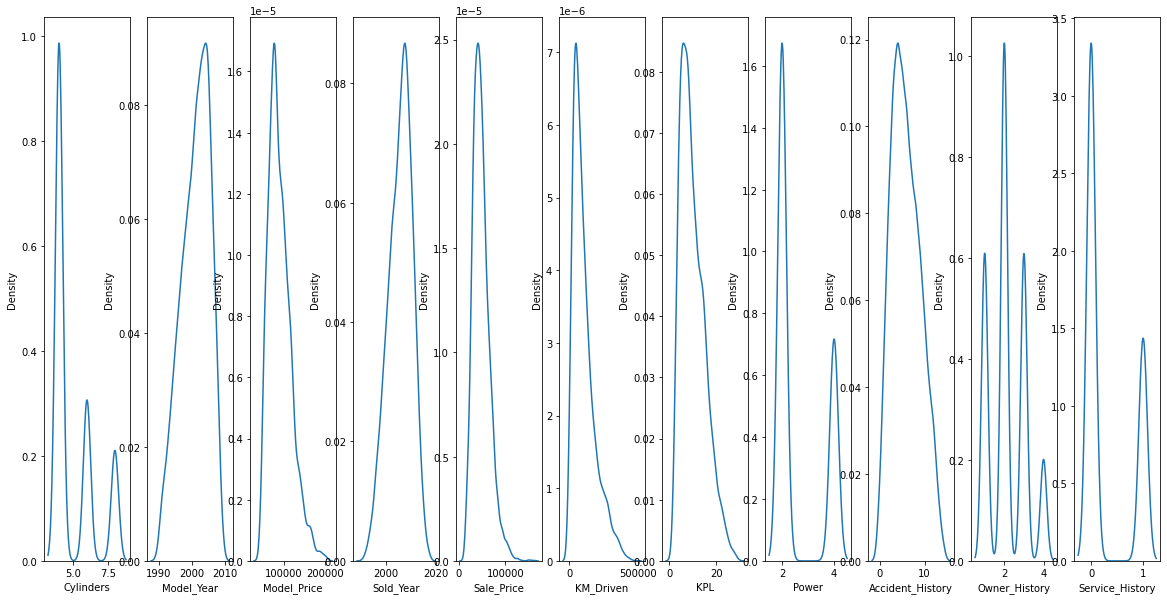

[0.03309419 0.58499479 0.058948   0.22530559 0.05046273 0.0037051
 0.03029059 0.00841635 0.00478266]


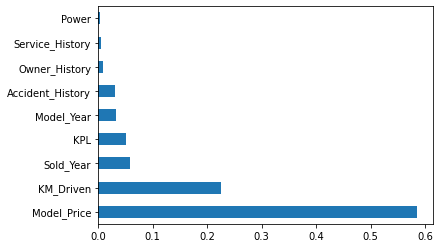

Sale_Price     1.000000
Model_Price    0.738200
KM_Driven      0.365168
KPL            0.260986
Power          0.242078
Name: Sale_Price, dtype: float64

In [389]:
df = pd.read_csv('Group_13_05_B.csv', delimiter =',')
df["Sale_Price"]=df["Sale_Price"].apply(lambda x: int(x.replace(",","").replace("SAR","")))
df["Model_Price"]=df["Model_Price"].apply(lambda x: int(x.replace(",","").replace("SAR","")))

df["KPL"]=df["KPL"].apply(lambda x: float(str(x).replace("mpl","")))
df['Power'] = df['Power'].apply(lambda x: float(str(x).replace("WD","")))
df['Power'].astype('int')

fig,ax = plt.subplots(1,11,figsize=(20,10))

for i,j in enumerate(df.select_dtypes(exclude='object').columns):
    print(j)
    sns.kdeplot(df[j],ax=ax[i])
plt.show()
# cylinders are a multiclass function ! therefore having a multimodal distribution 
# others are skewed normal distributions 
# hence we drop multimodality from data by dropping cylinders
df.drop(['Cylinders'],axis=1,inplace=True)

X = df.loc[:,df.select_dtypes(exclude='object').drop('Sale_Price',axis=1).columns]  #independent columns
y = df.loc[:,'Sale_Price']    #target column i.e sale_price

model = RandomForestRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## So we should be removing the less important columns 
# cylinders, serevice_history,owner_history , accident_history,model_year
# If power comes out to be less corelated with sale_price we drop it !!
corr = df[['Model_Price','KM_Driven','KPL','Sale_Price','Power']].corr()
corr=corr.apply(lambda x: np.abs(x))
corr.sort_values(by=['Sale_Price'], ascending=False)['Sale_Price']
# We can consider Power since its still is less corelated with the target column

## Task-10

In [417]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
test = pd.read_csv('Group_13_05_C.csv')
test["Sale_Price"]=test["Sale_Price"].apply(lambda x: int(str(x).replace(",","").replace("SAR","")))
test["Model_Price"]=test["Model_Price"].apply(lambda x: int(str(x).replace(",","").replace("SAR","")))
test['Power'] = test['Power'].apply(lambda x: float(str(x).replace("WD","")))
test['Power'].astype('int')
# we exclude columns-->
# Manufacturer,Model_Year,Location,Accident_History,Owner_History,Color,Seller_Type,Service_History,Cylinder
#location - feature doesnt help for target variable prediction


# We transform some categorical columns
Class= {'standard':0,'premium':1}
test['Class'].replace(Class,inplace=True)

test[['sedan','suv']] = pd.get_dummies(df['Type'],drop_first=True)
test.drop('Type',axis=1,inplace=True)

# dropping columns not needed for modelling process
test.drop(['Manufacturer','Model_Year','Location','Accident_History','Owner_History','Color','Seller_Type','Service_History','Cylinders'],axis=1,inplace=True)


# now modelling to predict 
rf = RandomForestRegressor()
X = test.loc[:,test.drop('Sale_Price',axis=1).columns]  #independent columns
y = test.loc[:,'Sale_Price']    #target column i.e sale_price

X_train,X_test,y_train,y_test = train_test_split(X,y)

rf.fit(X_train,y_train)

pred = rf.predict(X_test)

display(pred)

array([ 25981.62,  54413.2 ,  60785.06,  32831.5 ,  62292.13,  51910.58,
        26827.71,  42612.36,  68670.43,  35711.27,  48676.5 ,  52949.21,
        60145.58,  40846.59,  45587.06,  44262.76,  40005.07,  71443.75,
        49875.92,  43980.6 ,  44726.76,  62350.58, 105890.98,  53080.75,
        31866.38,  30603.43,  44526.64,  62046.4 ,  48693.34,  50363.55,
        32748.82,  55698.54,  36389.97,  39758.39,  26091.26,  36283.88,
        40103.83,  37372.06,  60770.91,  69523.07,  31383.43,  44011.37,
        16085.5 ,  40399.82,  46374.4 ,  50539.9 ,  17770.42,  59558.4 ,
        44392.61,  49254.08,  32025.69,  38818.01,  29941.63,  52350.78,
        38800.66,  43995.31,  36339.99,  35316.22,  48695.5 ,  44017.56,
        69944.82,  46266.03,  45023.88,  47298.96,  55615.73,  53019.88,
        50305.4 ,  44854.69,  51361.04,  30490.74,  41100.38,  22140.9 ,
        68106.91,  52223.82,  44358.73,  71037.16,  50237.37,  41343.41,
        60830.47,  25962.09,  27479.67,  95819.1 , 

## References